In [1]:
import numpy as np
from time import sleep
import random
from matplotlib import pyplot as plt


In [89]:
def getData():
    #随机获取三类数据及其标签
    dataMat = []; labelMat = []
    class1 = [[-150+random.randint(1,100),-150+random.randint(1,100)] for i in range(100)]
    class2 = [[-50+random.randint(1,100),50+random.randint(1,100)]  for i in range(100)]
    class3 = [[50+random.randint(1,100),-150+random.randint(1,100)]  for i in range(100)]
    dataMat = class1 + class2 + class3
    labelMat = [0 for i in range(100)] + [1 for j in range(100)] +  [2 for j in range(100)] 
    return dataMat,labelMat


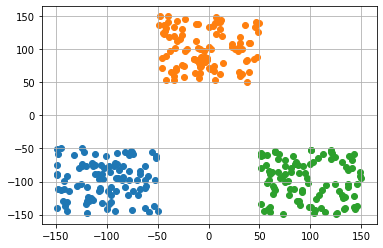

In [91]:
# 生成样本分布
dataMat,labelMat = getData()
dataMat = np.array(dataMat)
plt.figure()
plt.scatter(dataMat[0:100,0],dataMat[0:100,1])
plt.scatter(dataMat[100:200,0],dataMat[100:200,1])
plt.scatter(dataMat[200:300,0],dataMat[200:300,1])
plt.grid(True)


In [104]:
import random
class DataLoader:
    # 创建自己的数据加载器
    def __init__(self,X,y,batchsize,shuffle = True):
        self.X = np.array(X)
        self.y = np.array(y)
        self.bs = batchsize
        self.len = len(self.X)
        self.index =  list(range(self.len))
        if shuffle: random.shuffle(self.index)
    
    def __len__(self):
        return self.len

    def __iter__(self):
        self.it = 0
        return self
 
    def __next__(self):
        if self.it < self.len:
            x = self.X[self.index[self.it:min(self.it+self.bs,self.len)]]
            y = self.y[self.index[self.it:min(self.it+self.bs,self.len)]]
            self.it += self.bs
            return x,y
        else:
            raise StopIteration
        

class SVM:
    def __init__(self):
        # 初始化模型参数
        self.W = np.random.randn(2,3)
        # self.b = np.random.randn(1,3)
        self.b = np.zeros((1,3))
    
    def forward(self,x):
        # 前向传播
        return np.array(x).dot(self.W) + self.b

    def fucn_loss(self,X,labels,w,lam):
        """
        多类别SVM-损失函数
        @param:
            scores: 模型预测分数 M*N数组,M为样本数,N为类别数
            labels: 样本真实标签 M*1整数数组
            lam: 正则项系数
        @return:
            损失函数标量(float)
        """
        delta = 1
        loss = 0
        scores = np.array(X).dot(w)
        for s,y in list(zip(scores,labels)):
            margins = np.maximum(0, s - s[y] + delta)
            margins[y] = 0
            loss += np.sum(margins)

        return loss/len(scores) +lam*np.linalg.norm(w,ord=2)  # 使用二范数作为正则项项
    
    def eval_numerical_gradient(self,f, x):
        """  
        使用数值法求解梯度通用算法
        我们是求L关于w的梯度，f就是损失L，x就是权重矩阵w
        一个 f 在 x 处的数值梯度法的简单实现
        - f 是参数 x 的函数，x 是矩阵
        - x 是计算梯度的点
        """ 
        
        fx = f(x) # 计算x点处的函数值
        grad = np.zeros(x.shape)  # 梯度矩阵也是10x3073
        h = 0.00001  # 近似为0的变化量
        
        # 对x中所有的索引进行迭代，比如从（0,0）到（9,3072）
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        # np.nditer是np自带的迭代器
        # flags=['multi_index']表示对 x 进行多重索引 比如(0,0)
        # op_flags=['readwrite']表示不仅可以对x进行read（读取），还可以write（写入）
        while not it.finished:
        
            # 计算x+h处的函数值
            ix = it.multi_index   #索引从(0,0)开始，即从x矩阵第一行第一列的元素开始
            old_value = x[ix]   # 先将x(0,0)处原值保存
            x[ix] = old_value + h # 增加h
            fxh = f(x) # 计算新的f(x + h)
            x[ix] = old_value # 将x(0,0)处改回原值
        
            # 计算偏导数
            grad[ix] = (fxh - fx) / h # x(0,0)处的偏导数
            it.iternext() # 到下个维度x(0,1)
        
        return grad # 最终是计算好的梯度矩阵

    def optimizer(self,X,labels,lr):
        # 更新参数的优化器
        def batch_loss_fun(W):
            #定义批处理loss函数
            return self.fucn_loss(X,labels,W,0.01)

        grad = self.eval_numerical_gradient(batch_loss_fun,self.W)
        self.W = self.W - lr*grad


    def train(self,epoch,dataloader,learn_rate=0.01,lam=0.01):
        for i in range(epoch):
            it = iter(dataloader)
            for X,y in it:
                loss = self.fucn_loss(X,y,self.W,lam)
                self.optimizer(X,y,learn_rate)
                print("epoch:{},loss:{}".format(i,loss))

In [109]:
dl = DataLoader(X=dataMat,y=labelMat,batchsize=30,shuffle=True)
model = SVM()
model.train(epoch=1000,dataloader=dl,learn_rate=0.001,lam=0.001)

epoch:0,loss:192.06069028116033
epoch:0,loss:104.80594531505282
epoch:0,loss:130.83971353905147
epoch:0,loss:91.0859871649563
epoch:0,loss:80.6278433488412
epoch:0,loss:73.53307033512367
epoch:0,loss:30.997288784896103
epoch:0,loss:53.909197684967474
epoch:0,loss:34.448059913997156
epoch:0,loss:38.030751485494015
epoch:1,loss:22.166738548004396
epoch:1,loss:13.633042457757854
epoch:1,loss:23.60488694857121
epoch:1,loss:23.079672121373747
epoch:1,loss:22.952333273115165
epoch:1,loss:21.524460911447076
epoch:1,loss:6.762194215182229
epoch:1,loss:22.520769318537862
epoch:1,loss:12.025687400264472
epoch:1,loss:15.208599455744805
epoch:2,loss:1.9684348018723206
epoch:2,loss:6.17245604594744
epoch:2,loss:5.441250583969761
epoch:2,loss:7.875415006504787
epoch:2,loss:7.97002667015472
epoch:2,loss:5.432975507714066
epoch:2,loss:0.14986249298245943
epoch:2,loss:7.771571779868098
epoch:2,loss:3.5836066507496946
epoch:2,loss:3.795614960308751
epoch:3,loss:0.0016691998610556943
epoch:3,loss:2.76889

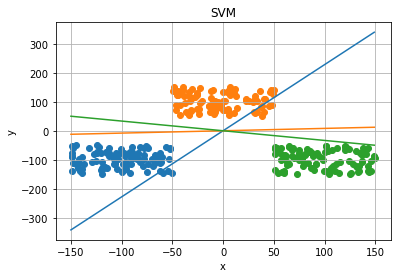

In [111]:
plt.figure()
plt.scatter(dataMat[0:100,0],dataMat[0:100,1])
plt.scatter(dataMat[100:200,0],dataMat[100:200,1])
plt.scatter(dataMat[200:300,0],dataMat[200:300,1])

#绘制直线（决策面） 
x = np.arange(-150,150)
for i in range(3):
    b_num = model.b[0][i]
    w0 = model.W[0][i]
    w1 = model.W[1][i]
    y = (-1)*(b_num+x*w0)/w1
    plt.plot(x,y)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('SVM')
plt.show()

